In [14]:
#Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [15]:
## Importing the dataset

df = pd.read_csv('C:\\Users\\Dell\\Downloads\\loan\\loan.csv')

### Viewing and understanding the dataset

In [16]:
# Taking a view of dataset

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [17]:
## Checking all the column names

df.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

### Cleaning the Dataset

In [18]:
## Dropping all the columns with all null values

df1=df.dropna(axis=1,how='all')

In [19]:
# Checking for the number of rows and columns in the dataset

df1.shape

(39717, 57)

In [20]:
## Checking the null values in remaining columns


df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [21]:
## Dropping the rows with null values

df1.drop(columns=['next_pymnt_d','mths_since_last_delinq','mths_since_last_record','desc'], inplace=True)

In [22]:
## Remove irrelevant columns.

df1.drop(labels = ["id","member_id","url","zip_code"], axis =1, inplace=True)
print("So now we are left with",df1.shape ,"rows & columns.")

So now we are left with (39717, 49) rows & columns.


In [23]:
## Checking the numerical columns

df1.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [24]:
df2 = df1.loc[:, (df1!=0).any(0)]
df2

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,...,0.00,Jul-10,80.90,Jun-10,NaN,1,INDIVIDUAL,NaN,NaN,NaN
39713,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,...,0.00,Jul-10,281.94,Jul-10,NaN,1,INDIVIDUAL,NaN,NaN,NaN
39714,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,...,0.00,Apr-08,0.00,Jun-07,NaN,1,INDIVIDUAL,NaN,NaN,NaN
39715,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,...,0.00,Jan-08,0.00,Jun-07,NaN,1,INDIVIDUAL,NaN,NaN,NaN


In [25]:
df2['int_per']= df2['int_rate'].apply(lambda x: float(x.split('%')[0]))
df2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens,int_per
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0,10.65
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,0.0,0.0,15.27
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0,15.96
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0,13.49
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0,12.69


In [26]:
df2.drop('int_rate', axis=1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens,int_per
0,5000,5000,4975.0,36 months,162.87,B,B2,NaN,10+ years,RENT,...,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0,10.65
1,2500,2500,2500.0,60 months,59.83,C,C4,Ryder,< 1 year,RENT,...,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,0.0,0.0,15.27
2,2400,2400,2400.0,36 months,84.33,C,C5,NaN,10+ years,RENT,...,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0,15.96
3,10000,10000,10000.0,36 months,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,...,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0,13.49
4,3000,3000,3000.0,60 months,67.79,B,B5,University Medical Group,1 year,RENT,...,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0,12.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,78.42,A,A4,FiSite Research,4 years,MORTGAGE,...,Jul-10,80.90,Jun-10,NaN,1,INDIVIDUAL,NaN,NaN,NaN,8.07
39713,8500,8500,875.0,36 months,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,...,Jul-10,281.94,Jul-10,NaN,1,INDIVIDUAL,NaN,NaN,NaN,10.28
39714,5000,5000,1325.0,36 months,156.84,A,A4,NaN,< 1 year,MORTGAGE,...,Apr-08,0.00,Jun-07,NaN,1,INDIVIDUAL,NaN,NaN,NaN,8.07
39715,5000,5000,650.0,36 months,155.38,A,A2,NaN,< 1 year,MORTGAGE,...,Jan-08,0.00,Jun-07,NaN,1,INDIVIDUAL,NaN,NaN,NaN,7.43


### Employment Term : Remove 'n/a' value with 'self-employed'.

In [27]:
##There are some values in emp_term which are 'n/a', we assume that are 'self-employed'. Because for 'self-employed' applicants, emp-lenth is 'Not Applicable'

print(df2.emp_length.unique())
df2.emp_length.fillna('0',inplace=True)
df2.emp_length.replace(['n/a'],'Self-Employed',inplace=True)
print(df2.emp_length.unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' '0']


In [28]:
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_per','annual_inc','dti']

df2[numeric_columns] = df2[numeric_columns].apply(pd.to_numeric)

##### Purpose of loan : Drop records where values are less than 0.75%

In [29]:
(df2.purpose.value_counts()*100)/len(df2)
del_loan_purpose = (df2.purpose.value_counts()*100)/len(df2)
del_loan_purpose = del_loan_purpose[(del_loan_purpose < 0.75) | (del_loan_purpose.index == 'other')]

df2.drop(labels = df2[df2.purpose.isin(del_loan_purpose.index)].index, inplace=True)
print("So now we are left with",df2.shape ,"rows & columns.")

print(df2.purpose.unique())

So now we are left with (35621, 48) rows & columns.
['credit_card' 'car' 'small_business' 'wedding' 'debt_consolidation'
 'home_improvement' 'major_purchase' 'medical' 'moving' 'vacation' 'house'
 'educational']


###### Loan Status : Drop records where values are less than 1.5%¶

In [30]:
## As we can see, Other than ['Current','Fully Paid' & Charged off] other loan_status are not relevent for our analysis.


(df2.loan_status.value_counts()*100)/len(df2)

del_loan_status = (df2.loan_status.value_counts()*100)/len(df2)
del_loan_status = del_loan_status[(del_loan_status < 1.5)]

df2.drop(labels = df2[df2.loan_status.isin(del_loan_status.index)].index, inplace=True)
print("So now we are left with",df2.shape ,"rows & columns.")

print(df2.loan_status.unique())


So now we are left with (35621, 48) rows & columns.
['Fully Paid' 'Charged Off' 'Current']


#### Making some derived columns

In [31]:
# 1. Loan amount to Annual Income ratio
df2['loan_income_ratio']= df2['loan_amnt']/df2['annual_inc']

# 2. Extract Year & Month from Issue date


df2['issue_month'],df2['issue_year'] = df2['issue_d'].str.split('-', 1).str
df2[['issue_d','issue_month','issue_year']].head()

,issue_d,issue_month,issue_year
0,Dec-11,Dec,11
1,Dec-11,Dec,11
2,Dec-11,Dec,11
5,Dec-11,Dec,11
6,Dec-11,Dec,11


In [32]:
## Changing order of months

months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
df2['issue_month'] = pd.Categorical(df2['issue_month'],categories=months_order, ordered=True)

#### Dividing loan amount in different ranges

In [33]:
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
df2['loan_amnt_range'] = pd.cut(df2['loan_amnt'], bins, labels=slot)

#### Dividing annual income in different ranges

In [34]:
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
df2['annual_inc_range'] = pd.cut(df2['annual_inc'], bins, labels=slot)

#### Dividing interest rate in different ranges

In [35]:
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
df2['int_rate_range'] = pd.cut(df2['int_per'], bins, labels=slot)

# Performing Univariate Analysis



In [61]:
def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile", color='pink')
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df2))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

#### Loan amount range

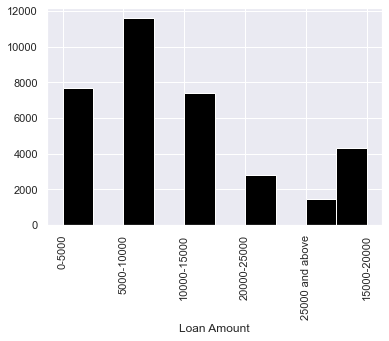

In [62]:
plt.hist(df2['loan_amnt_range'], color='black')
plt.xticks(rotation=90)
plt.xlabel('Loan Amount')
plt.show()

<font color='red'><b>Insights</b>: Most of the loan amounts are distributed between 5000 to 10000 USD.</font> 

#### Describing annual income

In [38]:
df2["annual_inc"].describe()

count    3.562100e+04
mean     6.959688e+04
std      6.500998e+04
min      4.000000e+03
25%      4.160000e+04
50%      6.000000e+04
75%      8.300400e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

###### Removing outliers 

In [39]:
q = df2["annual_inc"].quantile(0.995)
df2 = df2[df2["annual_inc"] < q]
df2["annual_inc"].describe()

count     35417.000000
mean      66946.761494
std       37318.468774
min        4000.000000
25%       41325.000000
50%       60000.000000
75%       82140.000000
max      294000.000000
Name: annual_inc, dtype: float64

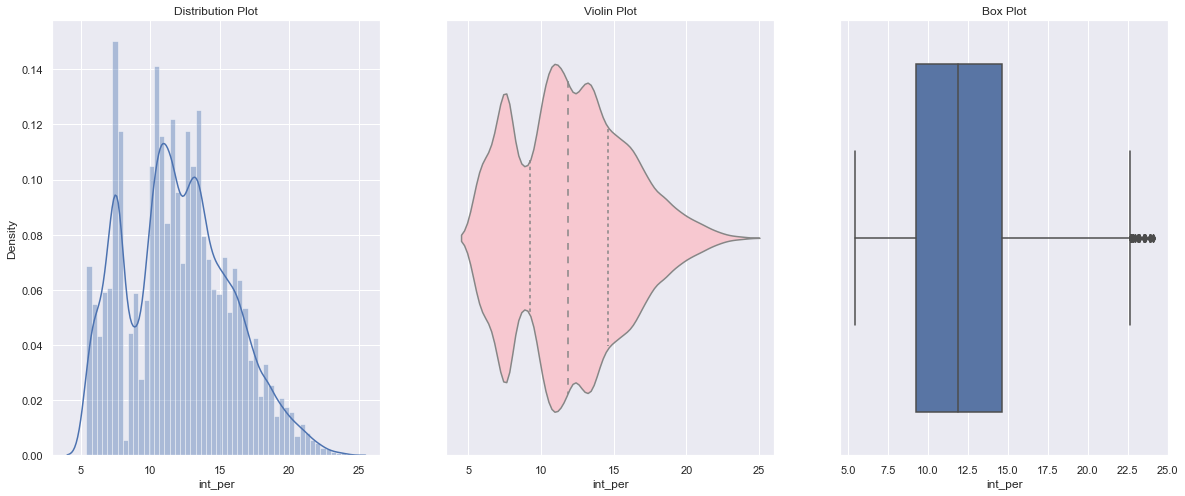

In [63]:
univariate(df=df2,col='int_per',vartype=0)

<font color='red'><b>Insights</b>: Most of the loans interest rates are distributed between 10% to 16%.</font> 

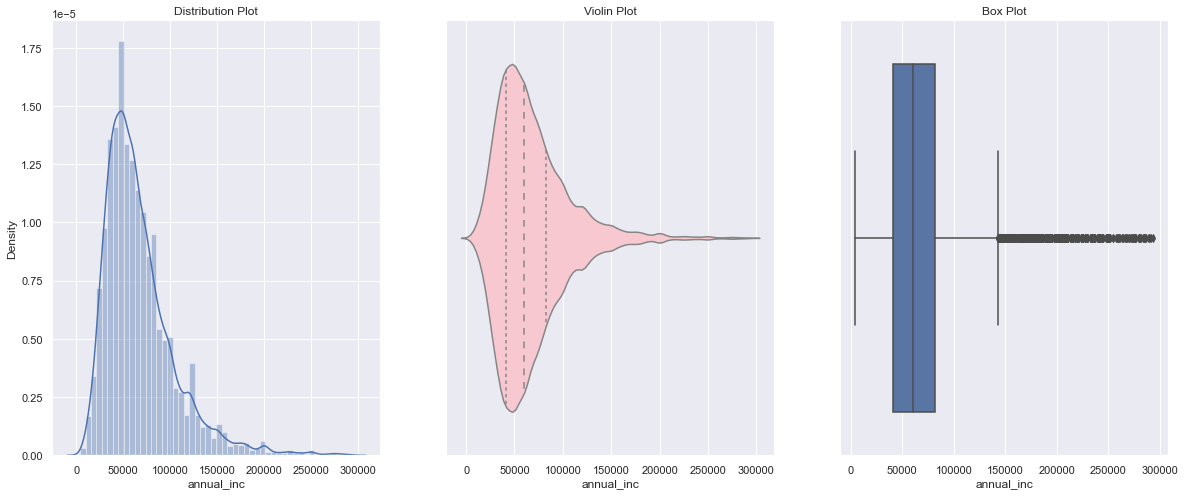

In [64]:
univariate(df=df2,col='annual_inc',vartype=0)

<font color='red'><b>Insights</b>: Most of the applicants earns between 40000 to 90000 USD annually.</font> 

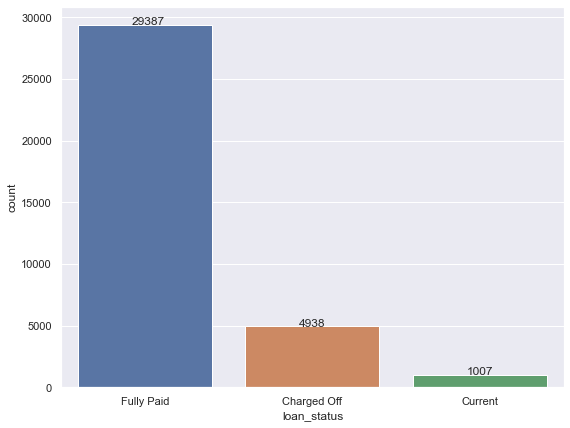

In [65]:
univariate(df=df2,col='loan_status',vartype=1)

<font color='red'><b>Insights</b>: Most of the applicants fully paid the loan. Only 4-5% were charged off</font> 

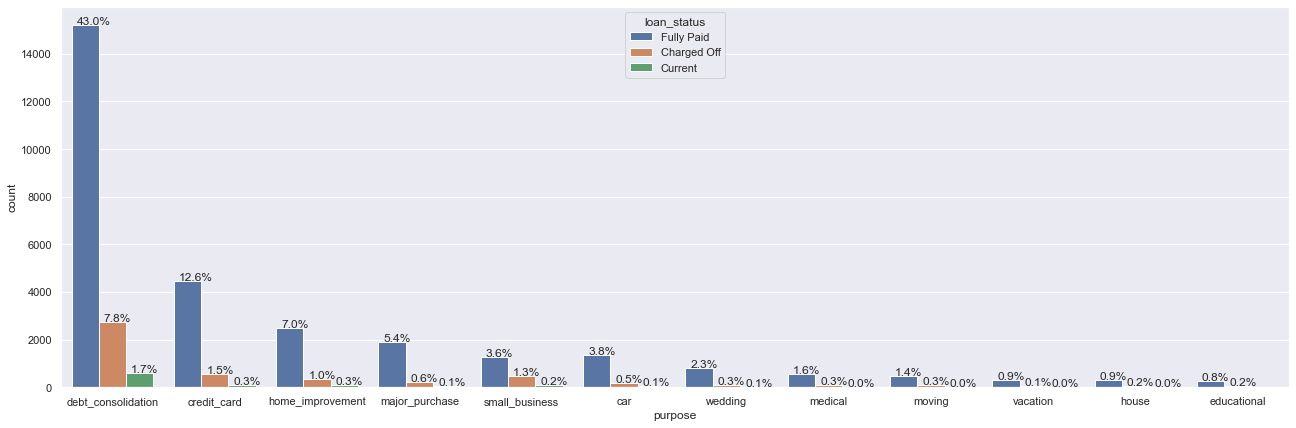

In [43]:
univariate(df=df2,col='purpose',vartype=1,hue='loan_status')

<font color='red'><b>Insights</b>: Approx 60% of the applicants applied loan for paying their other loans(Debt Consolidation).</font> 

### Home Ownership wise Loan

In [44]:
df2.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [45]:
# Remove rows where home_ownership'=='OTHER', 'NONE', 'ANY'
rem = ['OTHER', 'NONE', 'ANY']
df2.drop(df2[df2['home_ownership'].isin(rem)].index,inplace=True)
df2.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

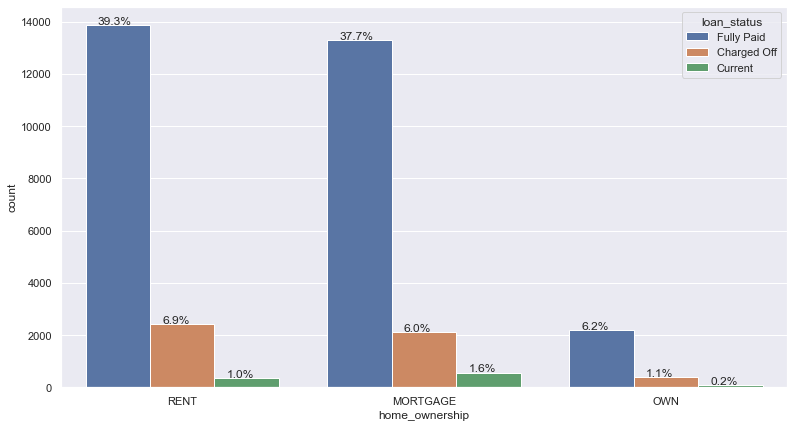

In [46]:
univariate(df=df2,col='home_ownership',vartype=1,hue='loan_status')

<font color='red'><b>Insights</b>: 40% of applicants are living in rented home whereas 37% applicants have mortagaged their home.</font> 


#### Year wise loan

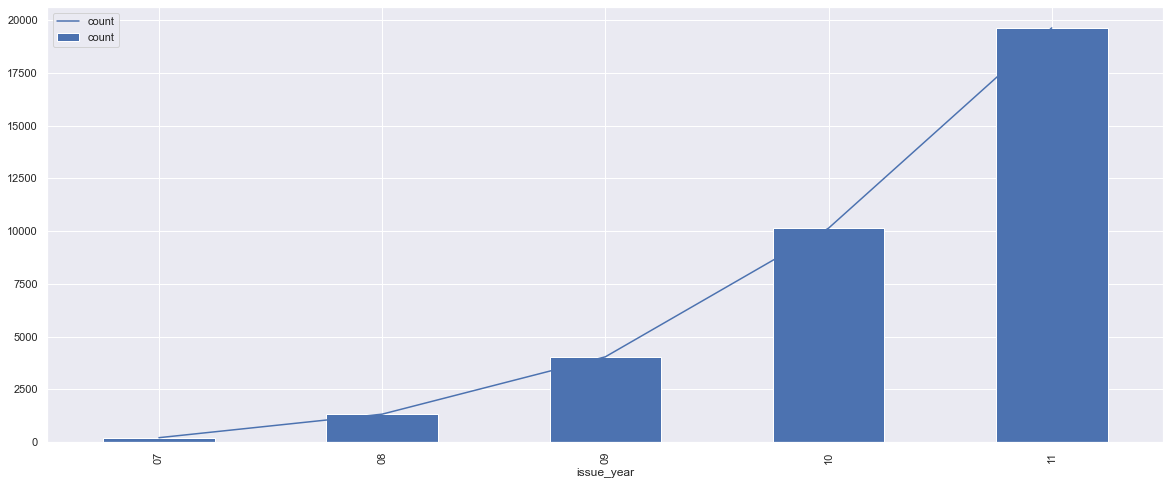

In [47]:
year_wise =df2.groupby(by= [df2.issue_year])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

<font color='red'><b>Insights</b>: loan applicants are increasing year on year, approx 47% of loan applicants received loans in 2011.</font> 

#### Loan Terms

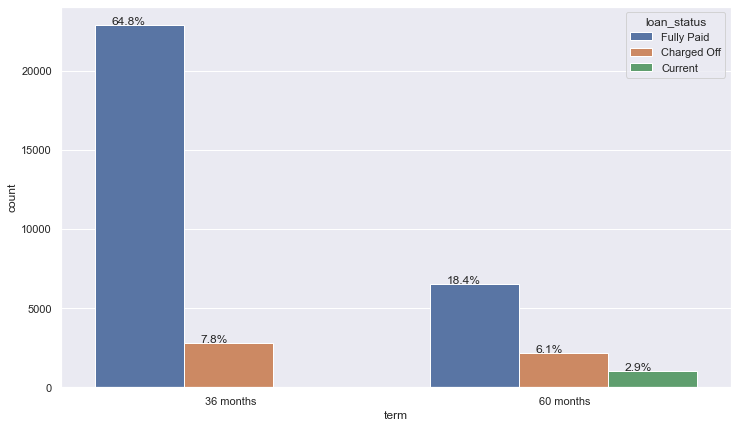

In [48]:
univariate(df=df2,col='term',vartype=1,hue='loan_status')

<font color='red'><b>Insights</b>: 70% of applicants applied loan for 36 months term period.</font> 

# Multivariate and Bivariate analysis

#### 1. Purpose of Loan vs Loan Amount for each Loan Status

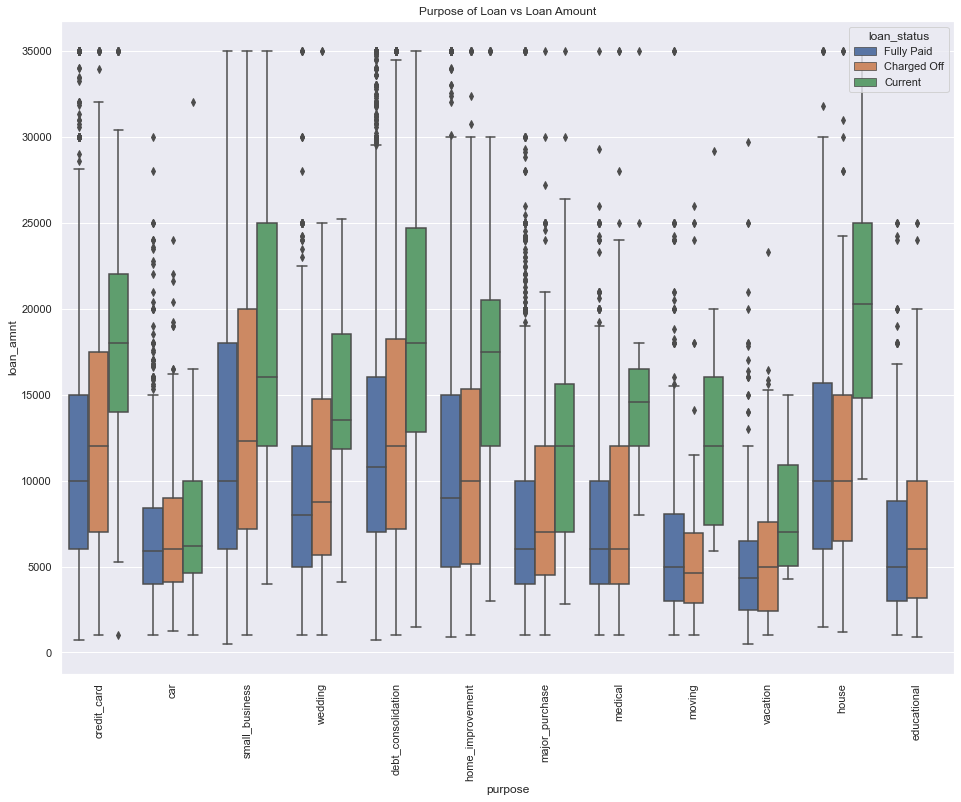

In [49]:
plt.figure(figsize=(16,12))
sns.boxplot(data =df2, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.xticks(rotation=90)
plt.show()

#### 2. Correlation Matrix : All Continuos(Numeric) Variables

In [50]:
loan_correlation = df2.corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens,int_per,loan_income_ratio
loan_amnt,1.000000,0.981056,0.939554,0.927163,0.418375,0.075617,-0.032072,0.006225,0.169722,-0.055194,...,0.136939,0.073555,0.441236,NaN,NaN,NaN,-0.041428,NaN,0.319438,0.612987
funded_amnt,0.981056,1.000000,0.958203,0.954032,0.413866,0.075248,-0.032303,0.007059,0.167863,-0.055676,...,0.137739,0.075629,0.445588,NaN,NaN,NaN,-0.042200,NaN,0.323261,0.600795
funded_amnt_inv,0.939554,0.958203,1.000000,0.902637,0.396071,0.081923,-0.038410,-0.007202,0.154923,-0.055514,...,0.124787,0.060842,0.436513,NaN,NaN,NaN,-0.045461,NaN,0.316363,0.572059
installment,0.927163,0.954032,0.902637,1.000000,0.418410,0.062471,-0.019347,0.006941,0.165395,-0.049537,...,0.119039,0.076586,0.392736,NaN,NaN,NaN,-0.037171,NaN,0.291664,0.548582
annual_inc,0.418375,0.413866,0.396071,0.418410,1.000000,-0.125617,0.029204,0.041941,0.249225,-0.022122,...,0.035829,0.021766,0.216840,NaN,NaN,NaN,-0.020976,NaN,0.080980,-0.319824
dti,0.075617,0.075248,0.081923,0.062471,-0.125617,1.000000,-0.037078,-0.001303,0.289073,-0.009155,...,0.024674,0.010592,0.011080,NaN,NaN,NaN,0.002217,NaN,0.115100,0.154608
delinq_2yrs,-0.032072,-0.032303,-0.038410,-0.019347,0.029204,-0.037078,1.000000,0.008051,0.010929,0.007187,...,0.012027,0.014734,-0.014763,NaN,NaN,NaN,0.003743,NaN,0.155607,-0.061569
inq_last_6mths,0.006225,0.007059,-0.007202,0.006941,0.041941,-0.001303,0.008051,1.000000,0.093163,0.024920,...,0.021003,0.014020,0.025877,NaN,NaN,NaN,0.015800,NaN,0.134299,-0.029680
open_acc,0.169722,0.167863,0.154923,0.165395,0.249225,0.289073,0.010929,0.093163,1.000000,0.003017,...,0.016528,0.006162,0.075480,NaN,NaN,NaN,0.007758,NaN,0.014439,-0.045807
pub_rec,-0.055194,-0.055676,-0.055514,-0.049537,-0.022122,-0.009155,0.007187,0.024920,0.003017,1.000000,...,-0.006171,-0.006731,-0.034132,NaN,NaN,NaN,0.851843,NaN,0.099347,-0.041601


#### 3. HeatMap: All continuous variables

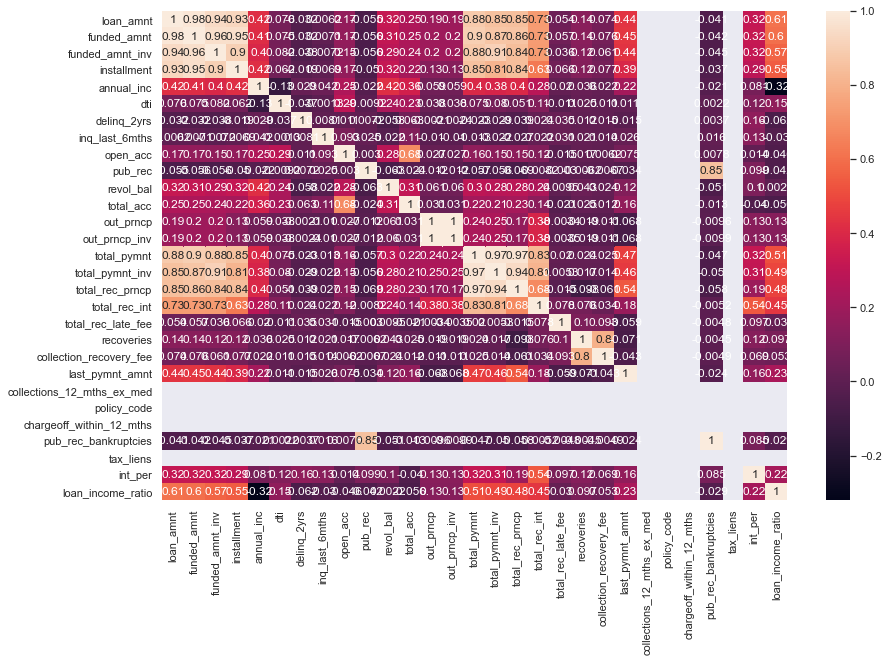

In [51]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

<font color='red'><b>Insights</b>: It is clear from the Heatmap that how <b>'loan_amnt','funded_amnt' & 'funded_amnt_inv'</b> are closely <b>interrelated</b>.So we can take any one column out of them for our analysis.</font> 

#### 4. Employment Length vs Loan Amount for different pupose of Loan

In [52]:
loanstatus=df2.pivot_table(index=['loan_status','purpose','emp_length'],values='loan_amnt',aggfunc=('count')).reset_index()
loanstatus=df2.loc[df2['loan_status']=='Charged Off']

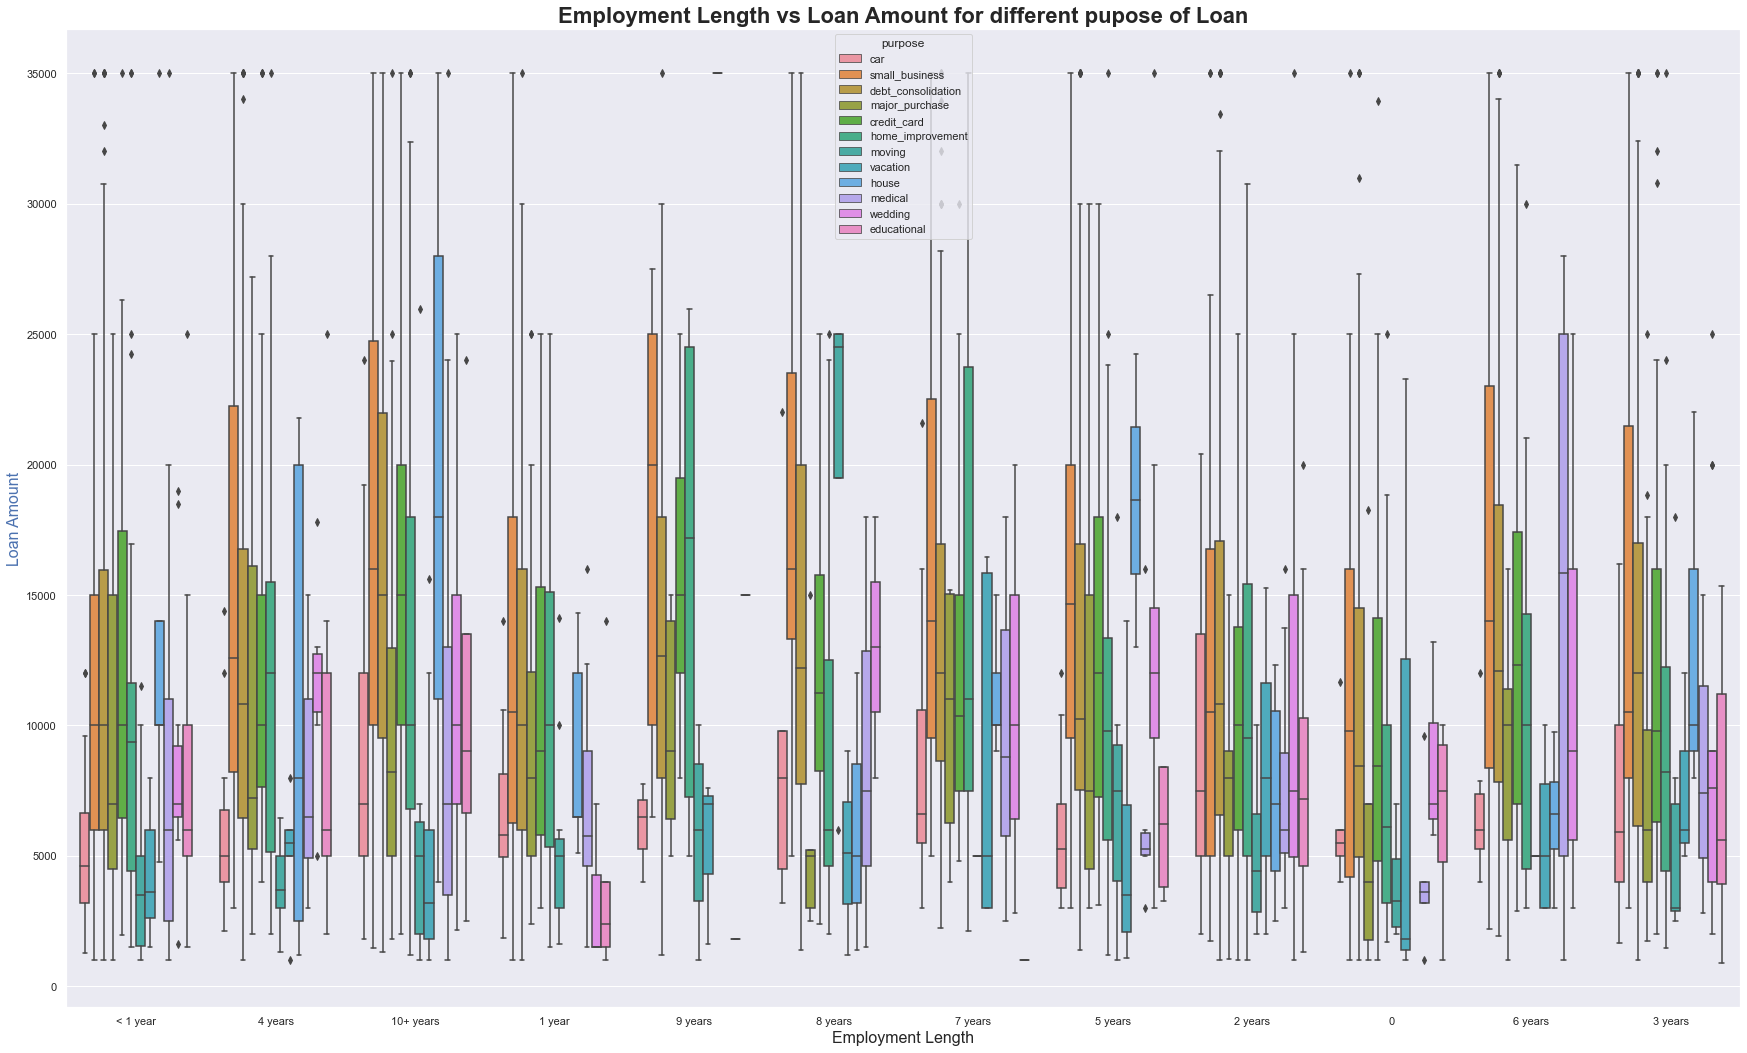

In [53]:
ax = plt.figure(figsize=(30, 18))
ax = sns.boxplot(x='emp_length',y='loan_amnt',hue='purpose',data=loanstatus)
ax.set_title('Employment Length vs Loan Amount for different pupose of Loan',fontsize=22,weight="bold")
ax.set_xlabel('Employment Length',fontsize=16)
ax.set_ylabel('Loan Amount',color = 'b',fontsize=16)
plt.show()

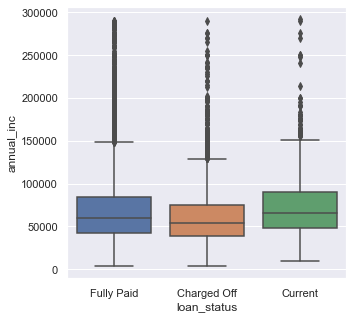

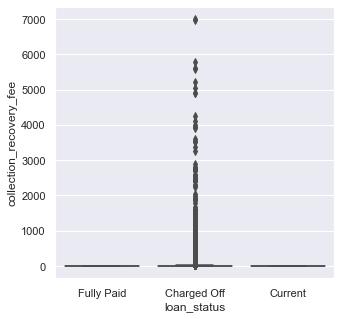

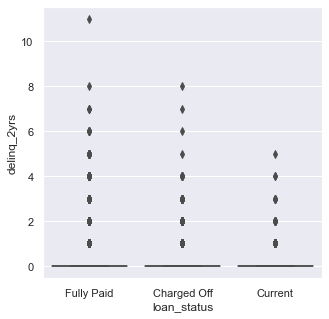

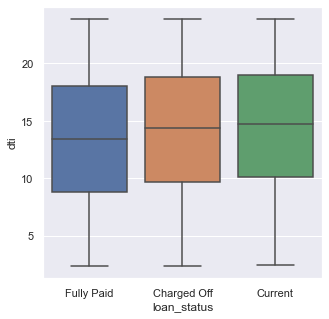

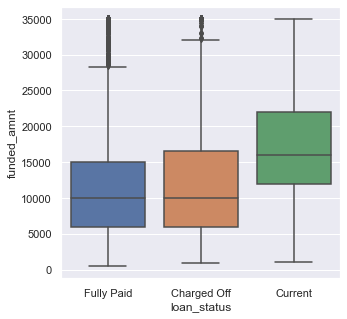

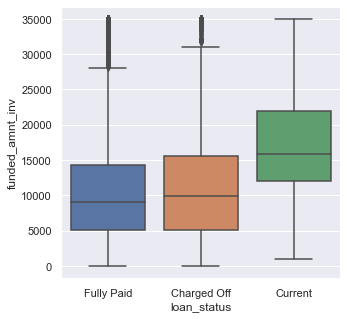

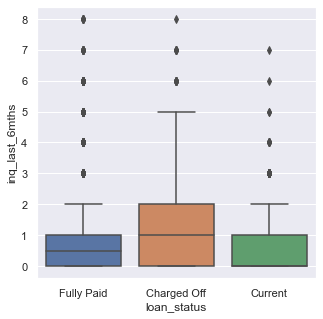

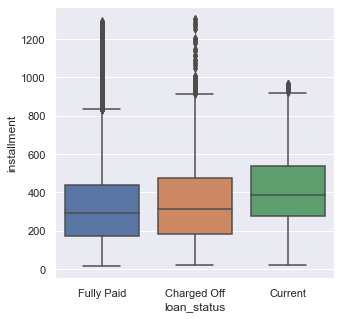

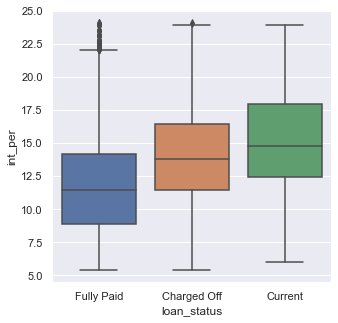

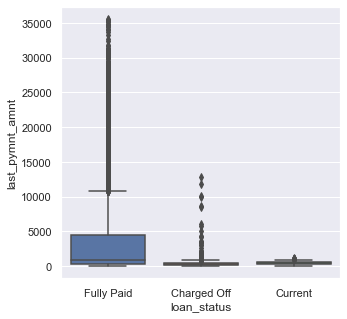

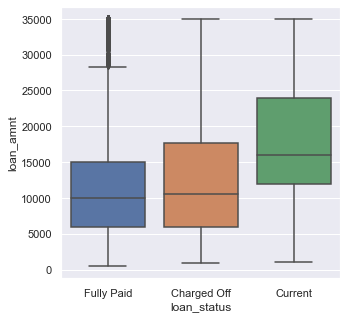

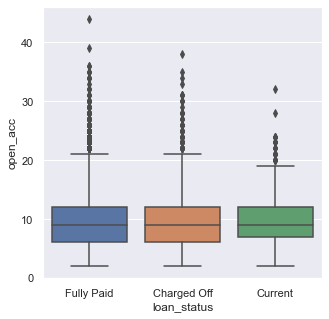

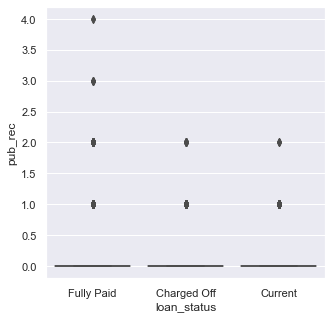

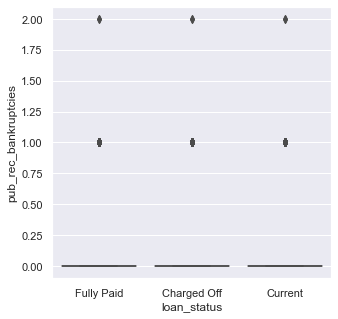

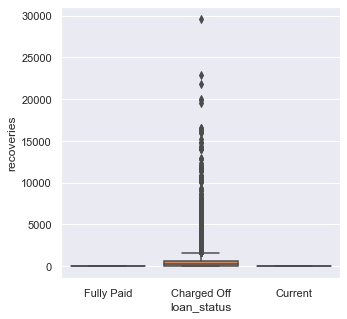

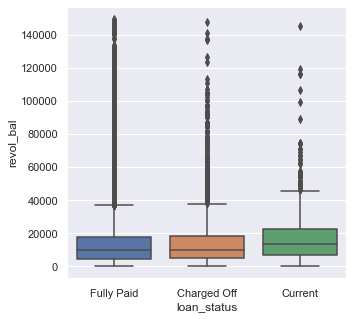

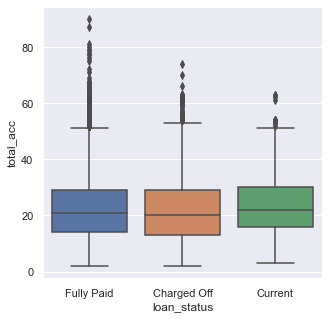

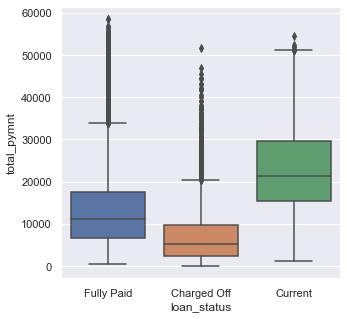

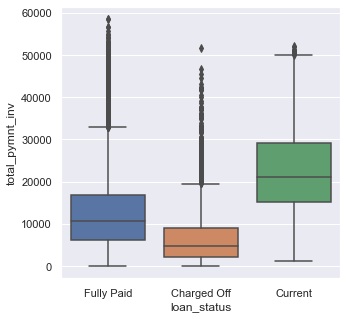

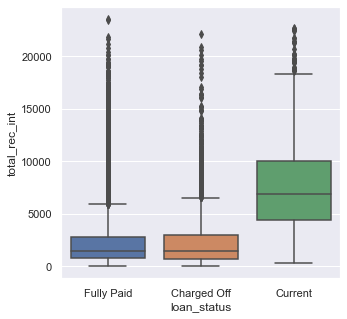

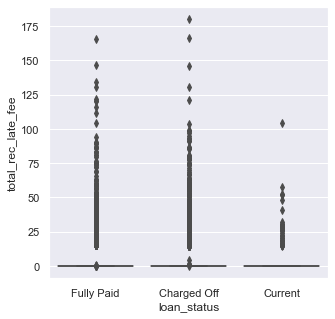

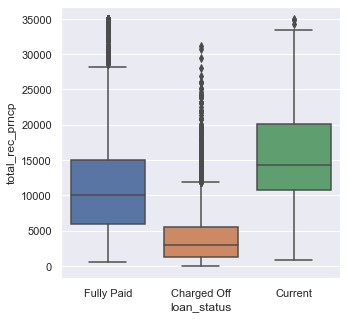

In [54]:
fields = [
    'annual_inc', 'collection_recovery_fee', 'delinq_2yrs', 'dti', 'funded_amnt',
    'funded_amnt_inv', 'inq_last_6mths', 'installment', 'int_per', 
    'last_pymnt_amnt', 'loan_amnt', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'recoveries',
    'revol_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
    'total_rec_late_fee', 'total_rec_prncp']
for f in fields:
    # Plot to compare impact of field on loan status.
    plt.figure(figsize=(5,5))
    low, high = df2.dti.quantile([0.05, 0.95])
    ax = sns.boxplot(x='loan_status', y=f, data=df2[df2.dti.between(low,high)])
    plt.show()

Following fields (columns) relate to more likely to default on loans: 
1. LESSER annual income (The self-reported annual income provided by the borrower during registration.) 
2. HIGHER dti (A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.) 
3. HIGHER inq_last_6mths (The number of inquiries in past 6 months (excluding auto and mortgage inquiries).) 
4. HIGHER int_rate (Interest Rate on the loan) 
5. LESSER last_pymnt_amnt (Last month payment was received.) 
6. HIGHER loan_amnt (The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value. ) 
7. LESSER total_acc (The total number of credit lines currently in the borrower's credit file) 
8. LESSER total_pymnt (Payments received to date for total amount funded) 
9. LESSER total_pymnt_inv (Payments received to date for portion of total amount funded by investors) 
10. LESSER total_rec_prncp (Principal received to date)



### Plotting co-relation between selected quantitative fields (columns) i.e. fields that were related to loan status

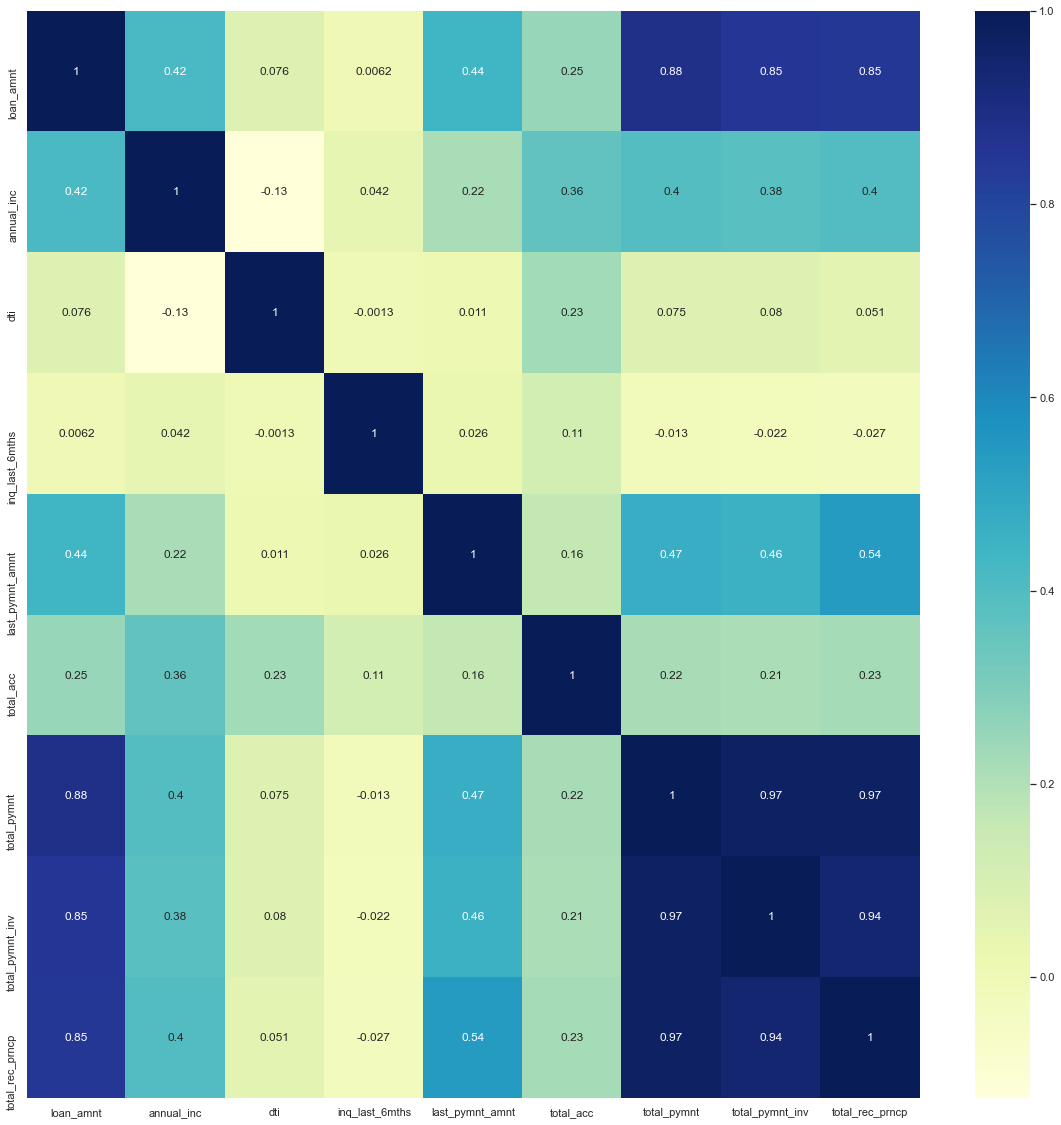

In [55]:
df3 = df2[['loan_status','loan_amnt','annual_inc','dti','inq_last_6mths','int_rate','last_pymnt_amnt','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp']]
plt.figure(figsize = (20,20))
sns.heatmap(df3.corr(),annot=True, cmap="YlGnBu")
plt.show()